# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

In [ ]:
%pip install geopandas matplotlib

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
denver = pd.read_csv('./denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


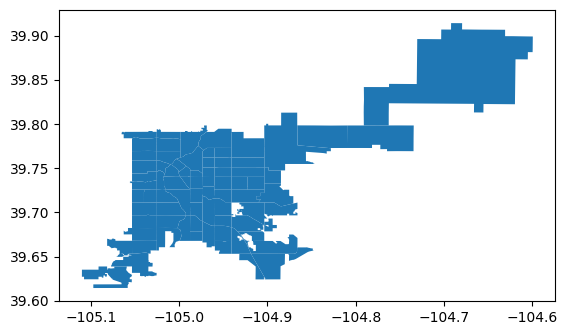

In [3]:
neighborhoods = gpd.read_file('./neighborhoods.shp')
neighborhoods.plot()
plt.show()

In [5]:
census = pd.read_csv('./census.csv')
census
for category in [census['AGE_LESS_18'], census['AGE_18_TO_34'], census['AGE_35_TO_65'], census['AGE_65_PLUS']]:
    census[f'{category}_PROPORTION']=category/census['POPULATION_2010']
    
for category in [census['AGE_LESS_18'], census['AGE_18_TO_34'], census['AGE_35_TO_65'], census['AGE_65_PLUS']]:
    max_nbhd=census[census[f'{category}_PROPORTION']==census[f'{category}_PROPORTION'].max()]["NBHD_NAME"].values[0]
    max_proportion=census[f'{category}_PROPORTION'].max()
    print(f'Neighborhood with the highest proportion in {category}: {max_nbhd} ({max_proportion:.2%})')
    

Neighborhood with the highest proportion in 0     2649.0
1        7.0
2      745.0
3     2015.0
4     1579.0
       ...  
73    2756.0
74    1304.0
75    5678.0
76    1119.0
77    1819.0
Name: AGE_LESS_18, Length: 78, dtype: float64: Sun Valley (54.01%)
Neighborhood with the highest proportion in 0     2406.0
1      635.0
2     1762.0
3     1647.0
4     1380.0
       ...  
73    2935.0
74    2555.0
75    4037.0
76    1586.0
77    3302.0
Name: AGE_18_TO_34, Length: 78, dtype: float64: Auraria (90.07%)
Neighborhood with the highest proportion in 0     3112.0
1       57.0
2     2037.0
3     2089.0
4     1824.0
       ...  
73    3111.0
74    3756.0
75    4712.0
76    1788.0
77    4085.0
Name: AGE_35_TO_65, Length: 78, dtype: float64: Country Club (50.45%)
Neighborhood with the highest proportion in 0      731.0
1        6.0
2      335.0
3      360.0
4      593.0
       ...  
73     938.0
74     925.0
75    1059.0
76     338.0
77    3383.0
Name: AGE_65_PLUS, Length: 78, dtype: float64: Win

Select the top three neighborhoods where your client should focus their search.

In [6]:
focusing_areas=census['POPULATION_2010']
focusing_areas.nlargest(3)

44    30348.0
27    29201.0
31    17547.0
Name: POPULATION_2010, dtype: float64